# ECOMMERCE PROJECT

In [33]:
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
db=mysql.connector.connect(host="localhost",user="root",password="@Amanaman321",database="ecommerce")

In [4]:
cus=db.cursor()

In [5]:
cus.execute("select * from CUSTOMER1") # customer table 1
#data=cus.fetchall()
#print(data)
customer_data=pd.DataFrame(cus.fetchall(),columns=[desc[0] for desc in cus.description])
print(customer_data.head()) # top 5 record

  customer_id     name              city                  email    phone_no  \
0       C1001    Steve             Tokyo        steve@gmail.com  4567897652   
1       C1002     john            Sydney         john@gmail.com  9987234567   
2       C1003    Peter          Kanagawa  peter.parker@mail.com  9969834567   
3       C1004  Jackson             Tokyo      Jackson@gmail.com  7765834567   
4       C1005     Jack  Lake Buena Vista         Jack@gmail.com  8876345678   

                    address  pin_code  
0                  f.g.road        99  
1                  k.c.road     75001  
2             2F Ikenobecho       171  
3           24-2, Sendagaya      8429  
4  1520 E Buena Vista Drive     32830  


In [6]:
print(customer_data['city'].value_counts())        # city wise customer details

city
Tokyo               22
Kanagawa            18
Sydney              12
Lake Buena Vista    10
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x1f5ae83fe00>,
 [Text(0.4844335208866584, 0.9875850160069034, ''),
  Text(-1.0999999999999959, -9.616505800409723e-08, ''),
  Text(-0.0557138249210145, -1.0985881711144858, ''),
  Text(0.9617813019850276, -0.5338321151373202, '')])

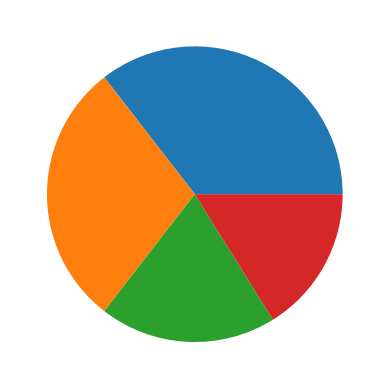

In [7]:
plt.pie(customer_data['city'].value_counts())         # pie diagram of city wise customer details(matplotlib)

Text(0, 0.5, 'Number of Customer')

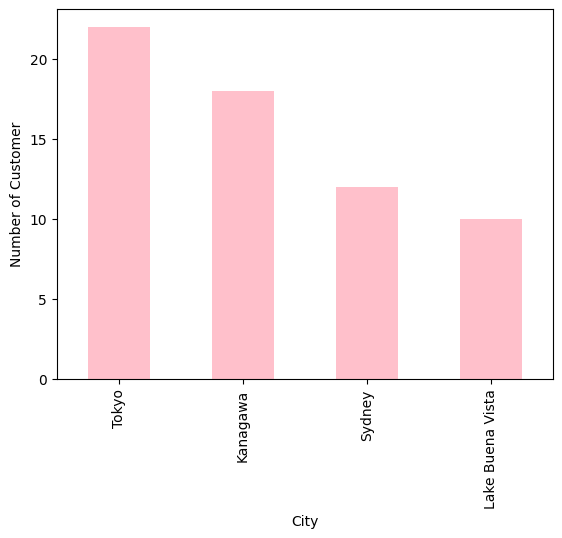

In [8]:
df=(customer_data['city'].value_counts())   # bar diagram of city wise customer details(matplotlib)
df.plot(kind='bar', color='pink')
#df.plot(kind='bar', color='pink')  # kind=bar,line,scatter
plt.xlabel("City")
plt.ylabel("Number of Customer")

In [9]:
cus.execute("select * from PRODUCTS1")  # products table 2
#data=cus.fetchall()
#print(data)
product_data=pd.DataFrame(cus.fetchall(),columns=[desc[0] for desc in cus.description])
print(product_data.head())

  product_id product_name     category sub_category  original_price  \
0       P102        Chair    furniture       Chairs         20000.0   
1       P103       Laptop  Electronics     computer         60000.0   
2       P104   Smartphone  Electronics        phone         45000.0   
3       P105      Blender    Appliance  Electronics           500.0   
4       P106    Laptop HP  Electronics    Computers         67200.0   

   selling_price  stock  
0       15000.00     10  
1       55000.00     50  
2       40000.00     20  
3         450.00     10  
4       55000.99     50  


category
Electronics    32
Appliance      20
Furniture       8
furniture       1
Name: count, dtype: int64


Text(0.5, 1.0, 'Number of products in each category')

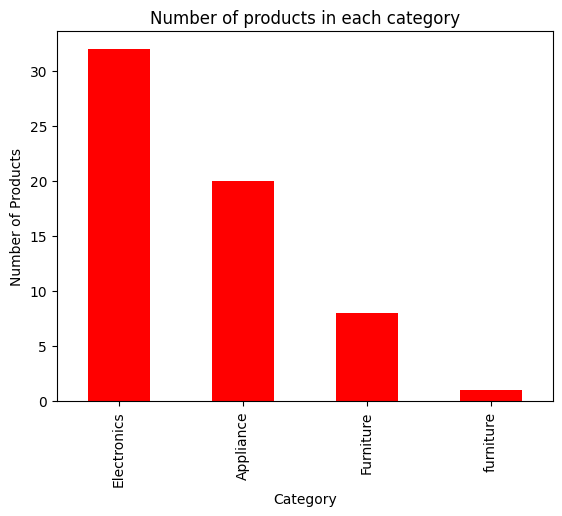

In [10]:
df=product_data['category'].value_counts().head(10) # Counting the number of products in each category.
print(df)
df.plot(kind='bar', color='red')
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.title("Number of products in each category")

sub_category
Electronics      20
Computers         9
Wearables         5
Audio             3
Entertainment     3
Chairs            2
Lamps             2
Accessories       2
Tablets           2
computer          1
Mobiles           1
phone             1
TVs               1
Desks             1
Cameras           1
Sofas             1
Tables            1
chairs            1
Consoles          1
Printers          1
Furniture         1
Photography       1
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of products across sub category')

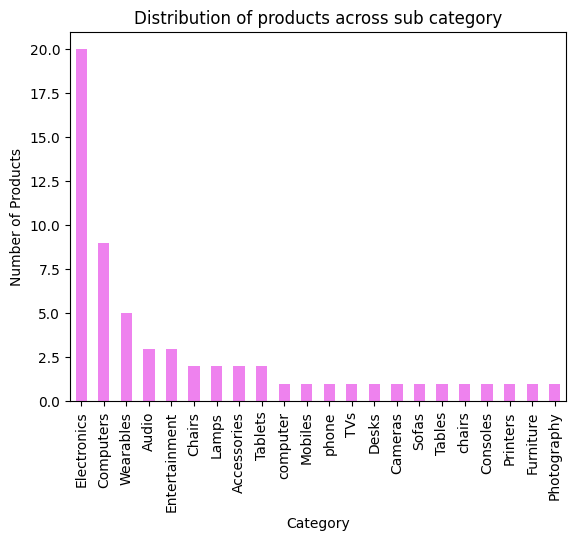

In [11]:
df=product_data['sub_category'].value_counts() # Distribution of products across sub category
print(df)
df.plot(kind='bar', color='violet')
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.title("Distribution of products across sub category")

   product_id         product_name     category sub_category  original_price  \
0        P102                Chair    furniture       Chairs         20000.0   
3        P105              Blender    Appliance  Electronics           500.0   
10       P112                chair    Furniture       chairs          1000.0   
12       P114         Refrigerator    Appliance  Electronics         20000.0   
30       P132             Sofa Set    Furniture    Furniture         50000.0   
33       P135           Dishwasher    Appliance  Electronics         18000.0   
39       P141              Printer  Electronics    Computers         12000.0   
42       P144  External Hard Drive  Electronics    Computers          5000.0   
46       P148               Tablet  Electronics    Computers         30000.0   

    selling_price  stock  
0         15000.0     10  
3           450.0     10  
10          800.0     10  
12        18000.0     12  
30        45000.0     10  
33        15000.0     12  
39        

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Chair'),
  Text(1, 0, 'Blender'),
  Text(2, 0, 'chair'),
  Text(3, 0, 'Refrigerator'),
  Text(4, 0, 'Sofa Set'),
  Text(5, 0, 'Dishwasher'),
  Text(6, 0, 'Printer'),
  Text(7, 0, 'External Hard Drive'),
  Text(8, 0, 'Tablet')])

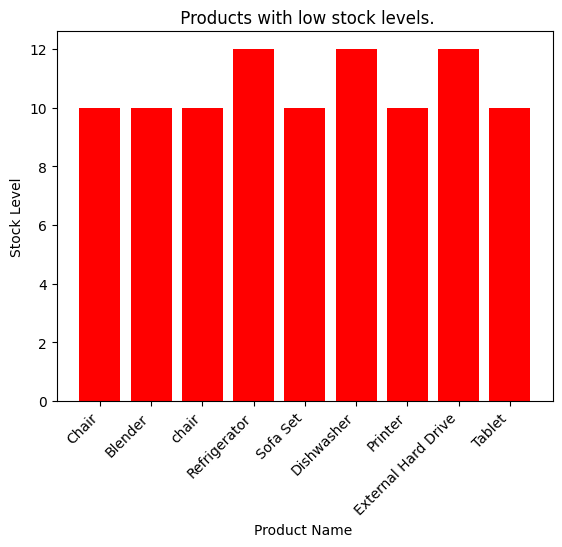

In [12]:
low_stock= 12             #  products with low stock levels.
low_stock_products = product_data[product_data['stock'] <= low_stock]
print(low_stock_products)
plt.bar(low_stock_products['product_name'], low_stock_products['stock'], color='red')
plt.xlabel("Product Name ")
plt.ylabel("Stock Level")
plt.title(" Products with low stock levels.")
plt.xticks(rotation=45, ha='right')

Text(0.5, 1.0, 'Average, Minimum, Maximum Price of Products')

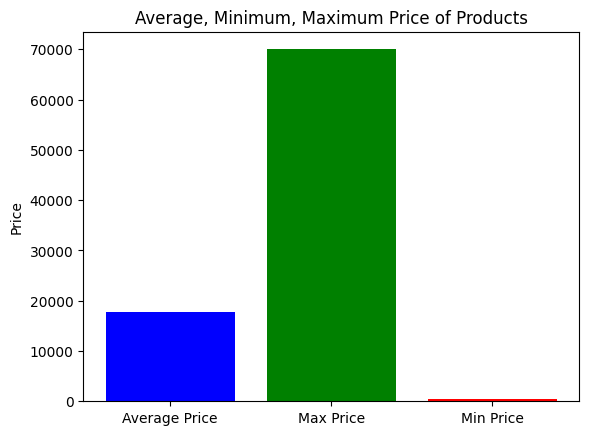

In [13]:
average_price = product_data['selling_price'].mean()
max_price = product_data['selling_price'].max()
min_price = product_data['selling_price'].min()
price_summary = pd.DataFrame({
    'Metric': ['Average Price', 'Max Price', 'Min Price'],
    'Value': [average_price, max_price, min_price]
})
plt.bar(price_summary['Metric'], price_summary['Value'], color=['blue', 'green', 'red'])
plt.ylabel("Price")
plt.title("Average, Minimum, Maximum Price of Products")

product_name
Tablet            4
Smartwatch        3
Vacuum Cleaner    3
Desk Lamp         2
Microwave Oven    2
Gaming Console    2
Printer           2
Digital Camera    2
Headphones        2
Television        2
Name: count, dtype: int64


Text(0.5, 1.0, 'Order wise product with product name')

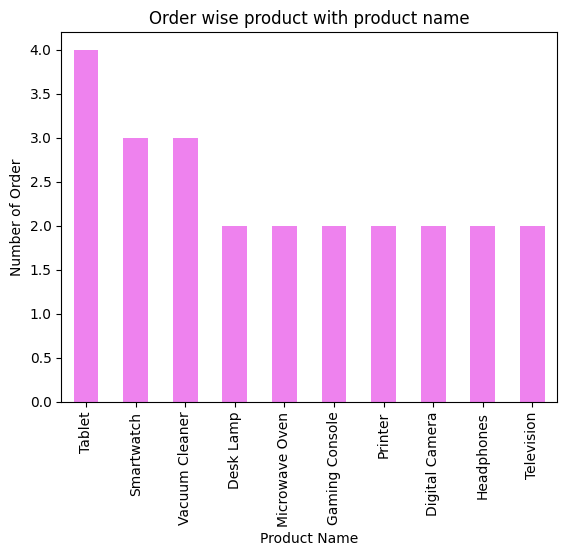

In [14]:
df=product_data['product_name'].value_counts().head(10) # Distribution of products across sub category
print(df)
df.plot(kind='bar', color='violet')
plt.xlabel("Product Name")
plt.ylabel("Number of Order")
plt.title("Order wise product with product name")


In [15]:
cus.execute("select * from order_details1")  # order details table 3
order_data=pd.DataFrame(cus.fetchall(),columns=[desc[0] for desc in cus.description])
print(order_data.head())
# data=cus.fetchall()
# print(data)

   order_id customer_id product_id  quantity  total_price payment_mode  \
0         3       C1004       P112       1.0       1000.0          COD   
1         4       C1005       P102       1.0      20000.0          COD   
2         5       C1005       P102       1.0      20000.0          COD   
3         7       C1006       P103       1.0      55000.0          COD   
4         8       C1006       P102       1.0      15000.0          COD   

  order_date order_status  
0 2023-11-30      Pending  
1 2023-11-30      Pending  
2 2023-12-08    Delivered  
3 2023-12-15    Delivered  
4 2023-12-01    delivered  


customer_id
C1005    3
C1010    3
C1009    3
C1013    3
C1006    2
C1008    2
C1003    2
C1014    2
C1011    2
C1015    2
Name: count, dtype: int64


Text(0, 0.5, 'Number of Orders')

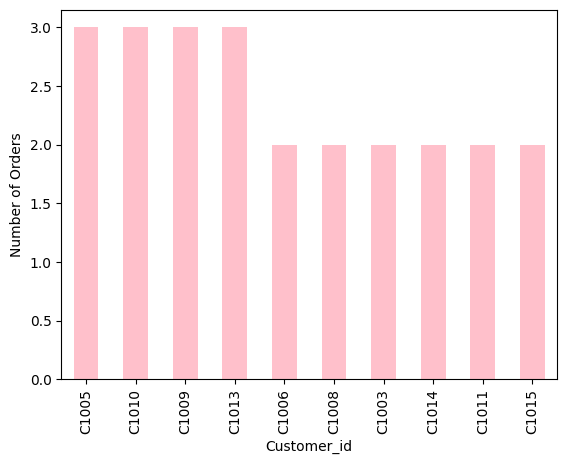

In [16]:
df=order_data['customer_id'].value_counts().head(10) #  Top 10 details , Determine the total number of products(no. of order) available by customer_id.
print(df)
df.plot(kind='bar', color='pink')  # bar diagram
plt.xlabel("Customer_id")
plt.ylabel("Number of Orders")

order_status
Delivered    27
Pending      25
Shipped      16
Cancelled     6
delivered     1
Returned      1
Name: count, dtype: int64


Text(0.5, 1.0, 'order status distribution')

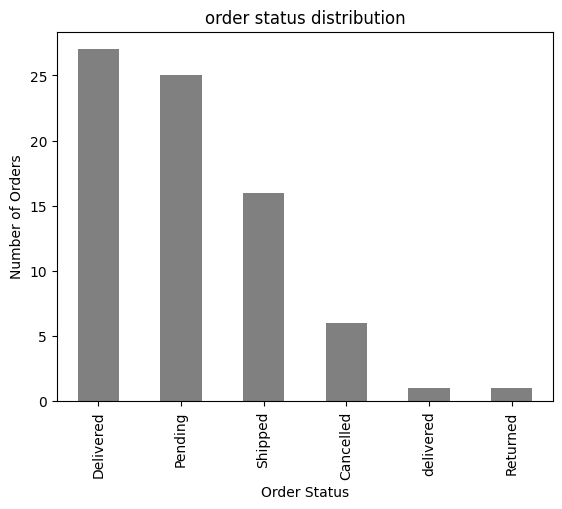

In [17]:
df = order_data['order_status'].value_counts()  # Analyze the order status distribution (e.g., pending, delivered).
print(df)
df.plot(kind='bar', color='grey')  # bar diagram
plt.xlabel("Order Status")
plt.ylabel("Number of Orders")
plt.title('order status distribution')

product_id
P110    4.0
P108    4.0
P114    3.0
P102    3.0
P109    3.0
P111    3.0
P125    3.0
P119    3.0
P117    3.0
P115    3.0
Name: quantity, dtype: float64


(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
 [Text(0.0, 0, '0.0'),
  Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5'),
  Text(4.0, 0, '4.0'),
  Text(4.5, 0, '4.5')])

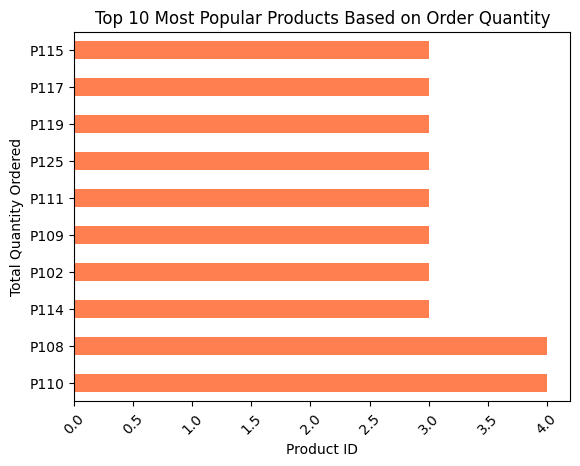

In [18]:
# Most Popular Products Based On Order Quantity  (By Merged Order table and Product Table)
popular_products = order_data.groupby('product_id')['quantity'].sum().sort_values(ascending=False)
print(popular_products.head(10))
popular_products.head(10).plot(kind='barh', color='coral')
plt.title('Top 10 Most Popular Products Based on Order Quantity')
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45)


  product_name  total_revenue
5        chair          800.0
0      Blender          900.0
1        Chair        45000.0
2         Desk        50000.0
4   Television        50000.0
3       Laptop       110000.0


Text(0.5, 1.0, 'Total Revenue Generated From Order')

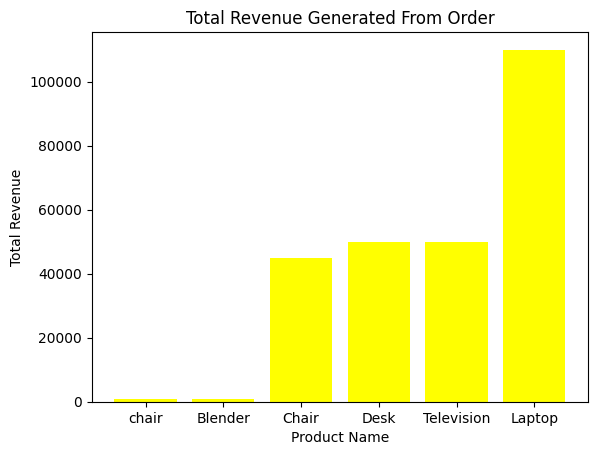

In [19]:
# Total Revenue Generated From Order
merged_df = order_data.merge(product_data, on='product_id').head(10) # Merge product and order data 
merged_df['total_revenue'] = merged_df['selling_price'] * merged_df['quantity'] # Calculating total revenue for each product

# Group by product and sum the total revenue
revenue_per_product = merged_df.groupby('product_name')['total_revenue'].sum().reset_index()
revenue_per_product = revenue_per_product.sort_values(by='total_revenue')
print(revenue_per_product)
plt.bar(revenue_per_product['product_name'], revenue_per_product['total_revenue'], color='yellow')
plt.xlabel("Product Name")
plt.ylabel("Total Revenue")
plt.title("Total Revenue Generated From Order")

      category  total_price  percentage
0    Appliance     327900.0   20.669440
1  Electronics     829000.0   52.256682
2    Furniture     374500.0   23.606909
3    furniture      55000.0    3.466969


Text(0.5, 1.0, 'Revenue Distribution by Product Category')

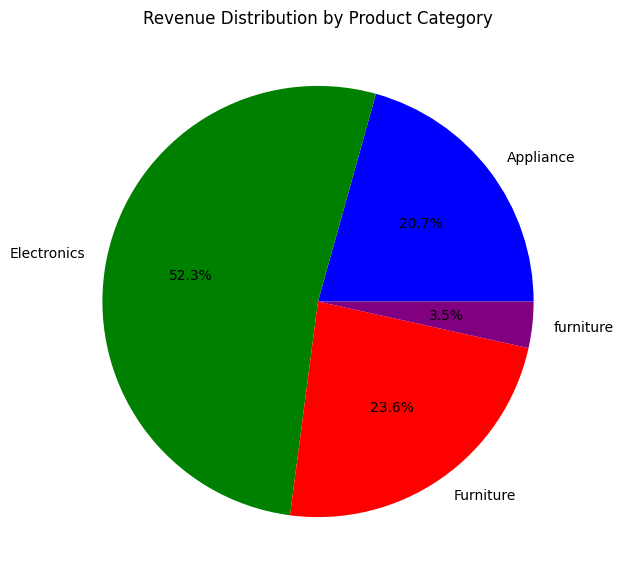

In [20]:
# Calculate total revenue product category wise percentage.
merged_df = order_data.merge(product_data, on='product_id')
category_revenue = merged_df.groupby('category')['total_price'].sum().reset_index()
category_revenue['percentage'] = (category_revenue['total_price'] / category_revenue['total_price'].sum()) * 100
print(category_revenue)
plt.figure(figsize=(7, 7))
plt.pie(category_revenue['total_price'], labels=category_revenue['category'], autopct='%1.1f%%', colors=['blue', 'green', 'red', 'purple'])
plt.title("Revenue Distribution by Product Category")

1586400.0


Text(0.5, 1.0, 'Total Revenue Generated from Orders')

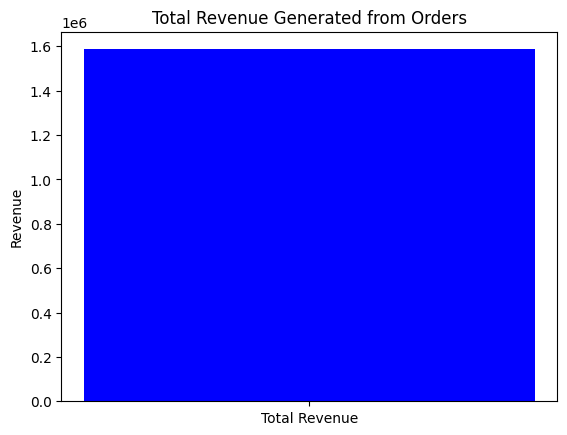

In [21]:
# Calculate the total revenue generated from all orders
total_revenue = order_data['total_price'].sum()
print(total_revenue)
# Plot bar chart
plt.bar(['Total Revenue'], [total_revenue], color='blue')
plt.ylabel('Revenue')
plt.title('Total Revenue Generated from Orders')


           product_name  profit
3               Blender   -50.0
10                chair  -200.0
17            Desk Lamp  -500.0
49         Gaming Mouse  -500.0
52       Wireless Mouse  -500.0
58     Portable Speaker  -500.0
59          Smart Scale  -500.0
16           Headphones -1000.0
42  External Hard Drive -1000.0
44         Coffee Maker -1000.0


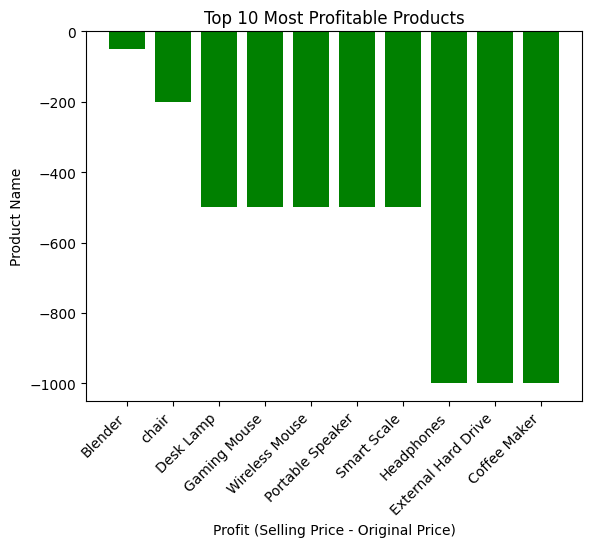

In [22]:
# Identify the most profitable products based on the difference between original and selling prices.
product_data['profit'] = product_data['selling_price'] - product_data['original_price']
profitable_products = product_data.nlargest(10, 'profit') # get top 10
plt.bar(profitable_products['product_name'], profitable_products['profit'], color='green')
plt.xlabel("Profit (Selling Price - Original Price)")
plt.ylabel("Product Name")
plt.title("Top 10 Most Profitable Products")
plt.xticks(rotation=45, ha='right')
print(profitable_products[['product_name', 'profit']])

Text(0.5, 1.0, 'Highest & Lowest Ordered Products')

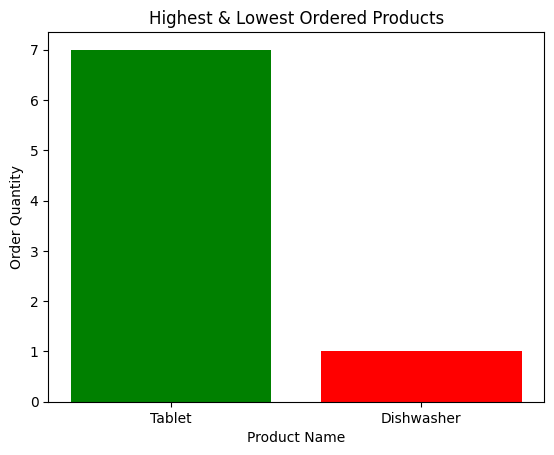

In [23]:
#  Identify product names with the highest and lowest order quantities.
product_orders = order_data.merge(product_data, on='product_id').groupby("product_name")["quantity"].sum()
highest_ordered_product = product_orders.idxmax()
lowest_ordered_product = product_orders.idxmin()
highest_quantity = product_orders.max()
lowest_quantity = product_orders.min()
top_bottom_products = {
    highest_ordered_product: highest_quantity,
    lowest_ordered_product: lowest_quantity
}

plt.bar(top_bottom_products.keys(), top_bottom_products.values(), color=['green', 'red'])
plt.xlabel("Product Name")
plt.ylabel("Order Quantity")
plt.title("Highest & Lowest Ordered Products")

Highest Order Quantity: 5.0 by Oliver
Lowest Order Quantity: 1.0 by Jackson


Text(0, 0.5, 'Total Order Quantity')

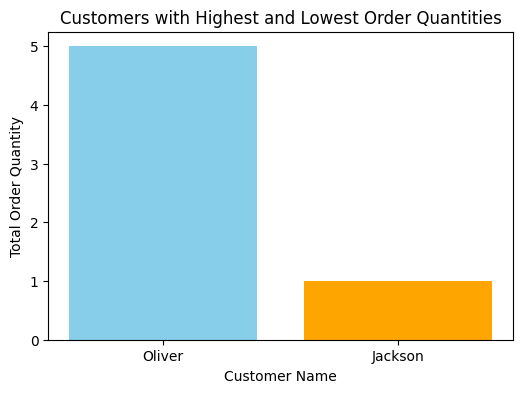

In [24]:
#  Identify customers with the highest and lowest order quantities by customer name
customer_order_quantities = order_data.groupby('customer_id')['quantity'].sum()
highest_order_customer = customer_order_quantities.idxmax()
highest_order_quantity = customer_order_quantities.max()
highest_customer_name = customer_data[customer_data['customer_id'] == highest_order_customer]['name'].values[0]
lowest_order_customer = customer_order_quantities.idxmin()
lowest_order_quantity = customer_order_quantities.min()
lowest_customer_name = customer_data[customer_data['customer_id'] == lowest_order_customer]['name'].values[0]
print(f'Highest Order Quantity: {highest_order_quantity} by {highest_customer_name}')
print(f'Lowest Order Quantity: {lowest_order_quantity} by {lowest_customer_name}')
plt.figure(figsize=(6, 4))
plt.bar([highest_customer_name, lowest_customer_name], [highest_order_quantity, lowest_order_quantity], color=['skyblue', 'orange'])
plt.title('Customers with Highest and Lowest Order Quantities')
plt.xlabel('Customer Name')
plt.ylabel('Total Order Quantity')

payment_mode
Online    43
COD       33
Name: count, dtype: int64


Text(0, 0.5, 'Number of Orders')

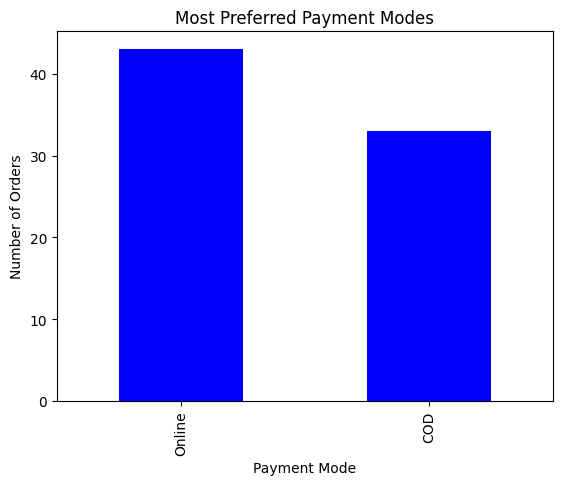

In [25]:
# Determine the most preferred payment modes.
payment_mode_counts = order_data['payment_mode'].value_counts()
print(payment_mode_counts)
payment_mode_counts.plot(kind='bar', color='blue')
plt.title('Most Preferred Payment Modes')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Orders')

order_date
2023-11     21450.0
2023-12    429450.0
2024-01    503000.0
2024-02    446000.0
2024-03    186500.0
Freq: M, Name: total_price, dtype: float64


Text(0, 0.5, 'Total Sales')

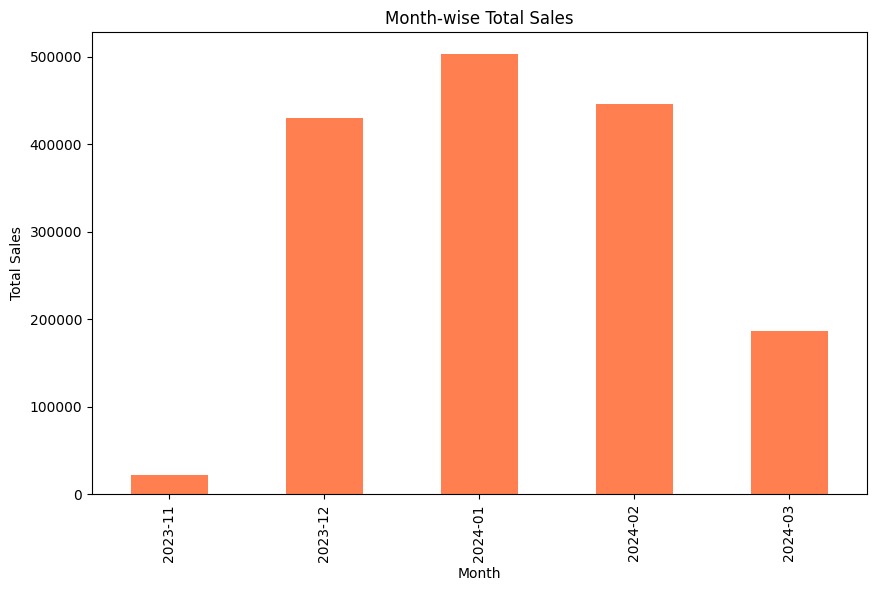

In [26]:
# Month wise total sales
order_data['order_date'] = pd.to_datetime(order_data['order_date'])
monthly_sales = order_data.groupby(order_data['order_date'].dt.to_period('M'))['total_price'].sum()
print(monthly_sales)
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='coral')
plt.title('Month-wise Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')


order_date
2023-11     21450.0
2023-12    429450.0
2024-01    503000.0
2024-02    446000.0
2024-03    186500.0
Freq: M, Name: total_price, dtype: float64


Text(0, 0.5, 'Total Sales')

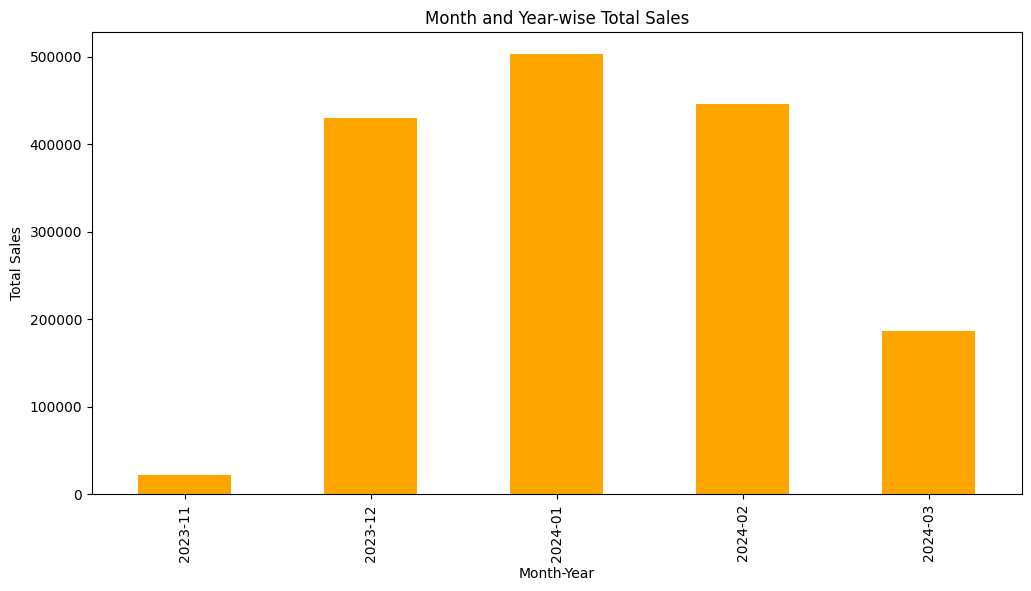

In [27]:
# Month and year wise total sales 
order_data['order_date'] = pd.to_datetime(order_data['order_date'])
monthly_yearly_sales = order_data.groupby(order_data['order_date'].dt.to_period('M'))['total_price'].sum()
print(monthly_yearly_sales)
plt.figure(figsize=(12, 6))
monthly_yearly_sales.plot(kind='bar', color='orange')
plt.title('Month and Year-wise Total Sales')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')


Peak Order Date: 2023-11-30 with 2 orders


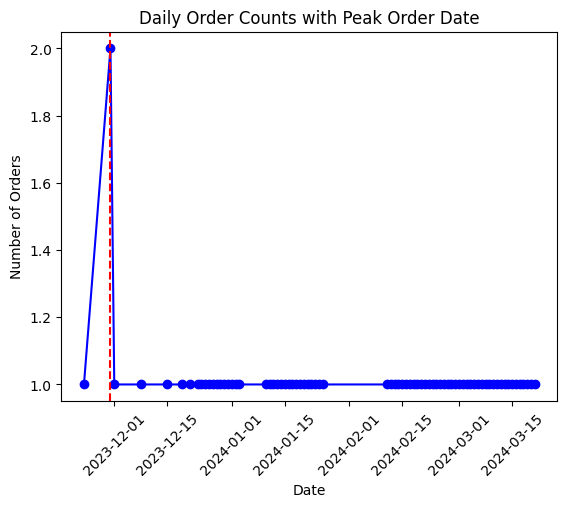

In [29]:
# Identify peak order date
order_data['order_date'] = pd.to_datetime(order_data['order_date'])
daily_order_counts = order_data.groupby(order_data['order_date'].dt.date)['order_id'].count()
peak_order_date = daily_order_counts.idxmax()
peak_order_count = daily_order_counts.max()
print(f'Peak Order Date: {peak_order_date} with {peak_order_count} orders')

plt.plot(daily_order_counts.index, daily_order_counts.values, marker='o', color='b')
plt.title('Daily Order Counts with Peak Order Date')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.axvline(x=peak_order_date, color='r', linestyle='--', label=f'Peak: {peak_order_date}')


city
Tokyo               22
Kanagawa            18
Sydney              12
Lake Buena Vista    10
Name: count, dtype: int64


Text(0, 0.5, 'Number of Customers')

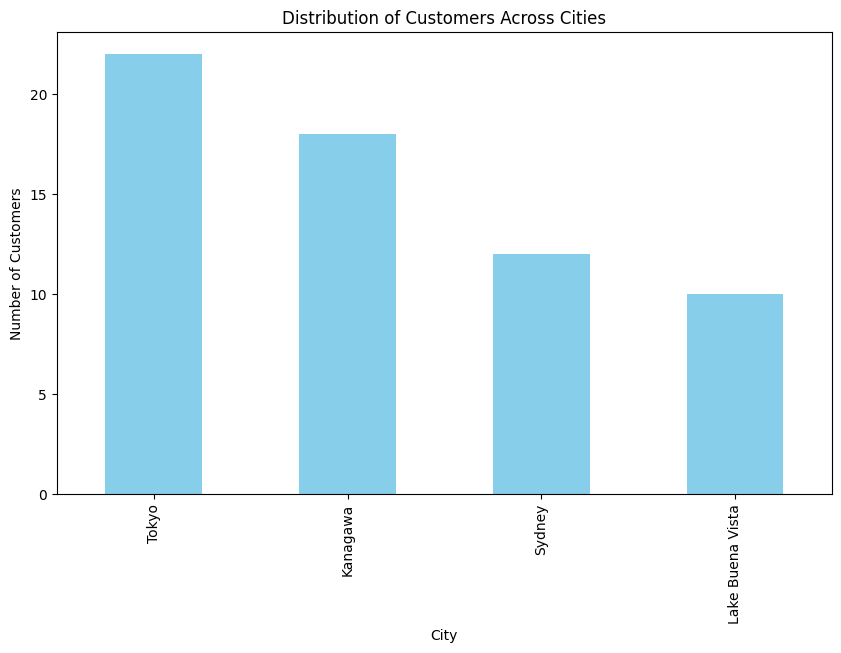

In [30]:
# Explore the distribution of customers across different cities.
customer_city_counts = customer_data['city'].value_counts()
print(customer_city_counts)
plt.figure(figsize=(10, 6))
customer_city_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Customers Across Cities')
plt.xlabel('City')
plt.ylabel('Number of Customers')


      product_name  quantity
5        Microwave       4.0
3             Desk       4.0
9     Refrigerator       3.0
0            Chair       3.0
4           Tablet       3.0
6       Television       3.0
20      Smartwatch       3.0
14       Desk Lamp       3.0
12  Vacuum Cleaner       3.0
10            Sofa       3.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Microwave'),
  Text(1, 0, 'Desk'),
  Text(2, 0, 'Refrigerator'),
  Text(3, 0, 'Chair'),
  Text(4, 0, 'Tablet'),
  Text(5, 0, 'Television'),
  Text(6, 0, 'Smartwatch'),
  Text(7, 0, 'Desk Lamp'),
  Text(8, 0, 'Vacuum Cleaner'),
  Text(9, 0, 'Sofa')])

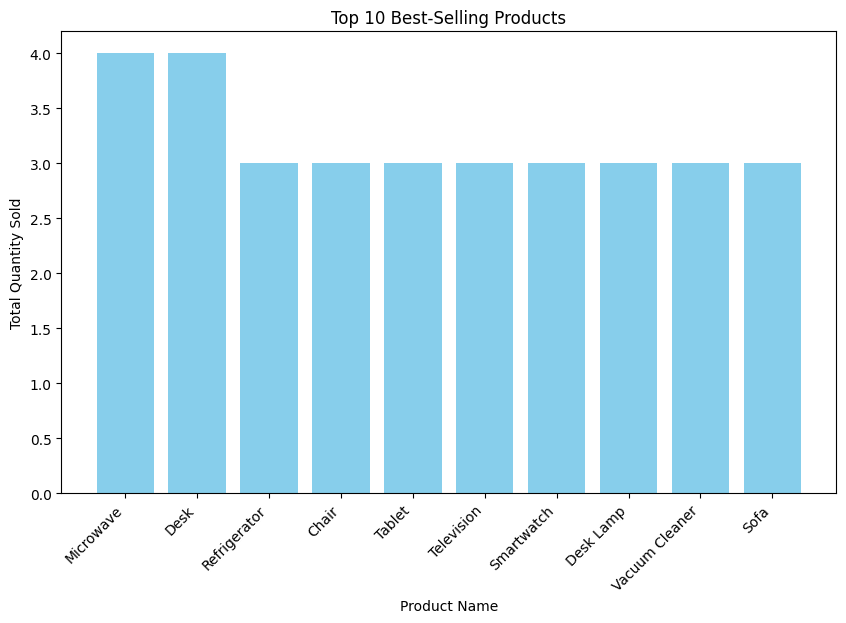

In [29]:
# Identify the best selling products
best_selling_products = order_data.groupby('product_id')['quantity'].sum().reset_index()
best_selling_products = best_selling_products.merge(product_data, on='product_id')
best_selling_products = best_selling_products.sort_values(by='quantity', ascending=False)
print(best_selling_products[['product_name', 'quantity']].head(10))
plt.figure(figsize=(10, 6))
plt.bar(best_selling_products['product_name'].head(10), best_selling_products['quantity'].head(10), color='skyblue')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right


      product_name  quantity
15         Printer       1.0
25      Television       1.0
26  Gaming Console       1.0
28  Water Purifier       1.0
21       Projector       1.0
19  Gaming Console       1.0
29          Tablet       1.0
30      Dishwasher       1.0
24      Smartwatch       1.0
16        Recliner       1.0


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Printer'),
  Text(1, 0, 'Television'),
  Text(2, 0, 'Gaming Console'),
  Text(3, 0, 'Water Purifier'),
  Text(4, 0, 'Projector'),
  Text(5, 0, 'Tablet'),
  Text(6, 0, 'Dishwasher'),
  Text(7, 0, 'Smartwatch'),
  Text(8, 0, 'Recliner')])

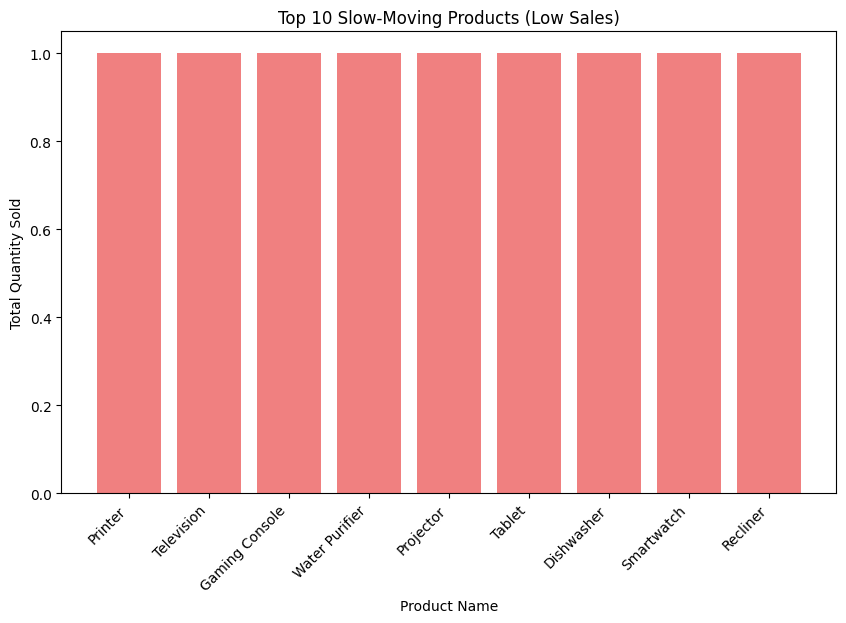

In [31]:
# Identify top 10 slow-moving products based on low sales.
slow_moving_products = order_data.groupby('product_id')['quantity'].sum().reset_index()
slow_moving_products = slow_moving_products.merge(product_data, on='product_id')
slow_moving_products = slow_moving_products.sort_values(by='quantity', ascending=True)
print(slow_moving_products[['product_name', 'quantity']].head(10))
plt.figure(figsize=(10, 6))
plt.bar(slow_moving_products['product_name'].head(10), slow_moving_products['quantity'].head(10), color='lightcoral')
plt.title('Top 10 Slow-Moving Products (Low Sales)')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')


order_status
Delivered    27
Pending      25
Shipped      16
Cancelled     6
delivered     1
Returned      1
Name: count, dtype: int64


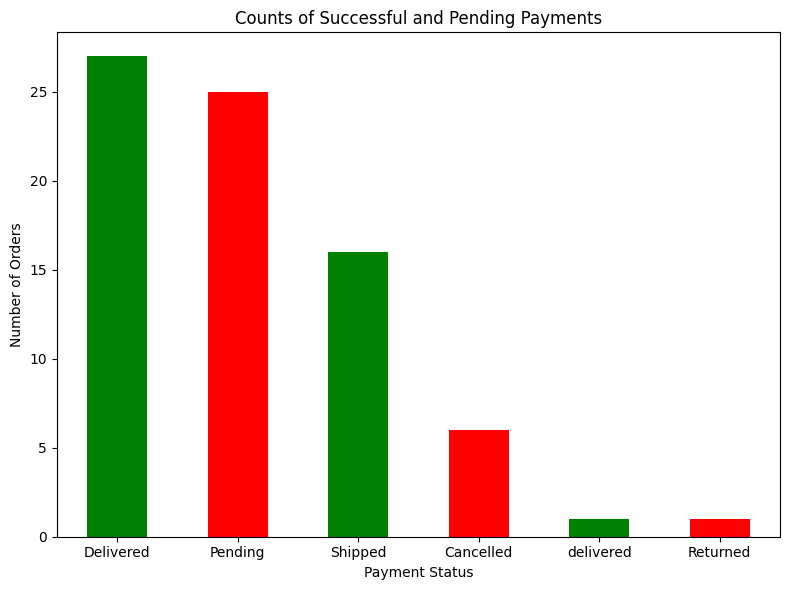

In [32]:
# Display successful and pending payments order counts
payment_status_counts = order_data['order_status'].value_counts()
print(payment_status_counts)
plt.figure(figsize=(8, 6))
payment_status_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Counts of Successful and Pending Payments')
plt.xlabel('Payment Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

 final 
     order_id product_id     category              city
0          3       P112    Furniture             Tokyo
1          4       P102    furniture  Lake Buena Vista
2          5       P102    furniture  Lake Buena Vista
3          7       P103  Electronics          Kanagawa
4          8       P102    furniture          Kanagawa
..       ...        ...          ...               ...
71        91       P159    Appliance             Tokyo
72        92       P160    Appliance  Lake Buena Vista
73        93       P161    Appliance          Kanagawa
74        94       P162  Electronics            Sydney
75        95       P154  Electronics             Tokyo

[76 rows x 4 columns]
category          Appliance  Electronics  Furniture  furniture
city                                                          
Kanagawa                8.0         11.0        5.0        1.0
Lake Buena Vista        4.0          7.0        2.0        2.0
Sydney                  5.0          7.0        2.0     

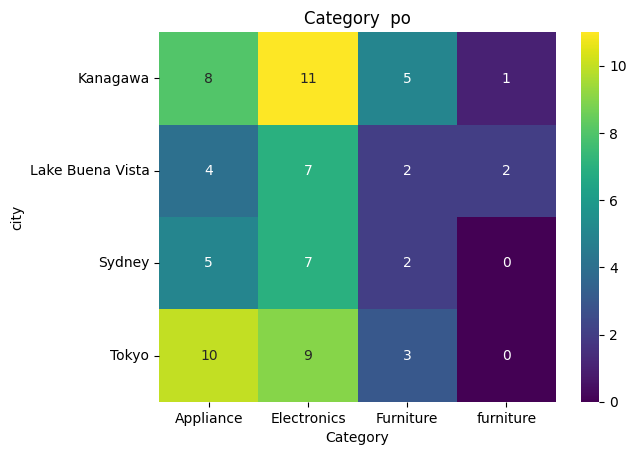

In [34]:
merged_order_data = pd.merge(order_data, product_data[['product_id', 'category']], on='product_id',how='left')

final_data=pd.merge(merged_order_data,customer_data[['customer_id', 'city']], on='customer_id',how='left')

print(" final \n", final_data[['order_id','product_id', 'category','city']])

category_region_city_counts = final_data.groupby(['city','category']).size().unstack().fillna(0)

print(category_region_city_counts)


sns.heatmap(category_region_city_counts,annot=True, cmap='viridis',fmt='g')
plt.title('Category  po')
plt.xlabel('Category')
plt.ylabel('city')
plt.show()

In [32]:
db.close()